<a href="https://www.kaggle.com/code/kapusharinka/network-anomaly-detection-unsupervised?scriptVersionId=147930050" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-intrusion-detection/Train_data.csv
/kaggle/input/network-intrusion-detection/Test_data.csv


# Network Anomaly Detection
https://en.wikipedia.org/wiki/Anomaly_detection#Popular_techniques</br>
https://medium.com/@AmyGrabNGoInfo/list/imbalanced-classification-and-anomalies-detection-dc908de4382d</br>
https://youtube.com/playlist?list=PLVppujud2yJo0qnXjWVAa8h7fxbFJHtfJ&feature=shared

## Data preprocessing and overview

In [2]:
train = pd.read_csv('/kaggle/input/network-intrusion-detection/Train_data.csv')
test = pd.read_csv('/kaggle/input/network-intrusion-detection/Test_data.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

### List of columns

#### BASIC FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Duration: Length of time duration of the connection
1. Protocol_type: Protocol used in the connection
1. Service: Destination network service used
1. Flag: Status of the connection – Normal or Error
1. Src_bytes: Number of data bytes transferred from source to destination in single connection
1. Dst_bytes: Number of data bytes transferred from destination to source in single connection
1. Land: if source and destination IP addresses and port numbers are equal then, this variable takes value 1 else 0
1. Wrong_fragment: Total number of wrong fragments in this connection
1. Urgent: Number of urgent packets in this connection. Urgent packets are packets with the urgent bit activated
#### CONTENT RELATED FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Hot: Number of „hot‟ indicators in the content such as: entering a system directory, creating programs and executing programs
1. Num_failed_logins: Count of failed login attempts
1. Logged_in Login Status: 1 if successfully logged in; 0 otherwise
1. Num_compromised: Number of compromised' ' conditions 
1. Root_shell: 1 if root shell is obtained; 0 otherwise 
1. Su_attempted: 1 ifsu root'' command attempted or used; 0 otherwise
1. Num_root: Number of root'' accesses or number of operations performed as a root in the connection 
1. Num_file_creations: Number of file creation operations in the connection 
1. Num_shells: Number of shell prompts 
1. Num_access_files: Number of operations on access control files 
1. Num_outbound_cmds: Number of outbound commands in an ftp session 
1. Is_hot_login: 1 if the login belongs to thehot'' list i.e., root or admin; else 0
1. Is_guest_login: 1 if the login is a guest, 0 otherwise
#### TIME RELATED TRAFFIC FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Count: Number of connections to the same destination host as the current connection in the past two seconds
1. Srv_count: Number of connections to the same service (port number) as the current connection in th e past two seconds
1. Serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)
1. Srv_serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)
1. Rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)
1. Srv_rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)
1. Same_srv_rate: The percentage of connections that were to the same service, among the connections aggregated in count (23)
1. Diff_srv_rate: The percentage of connections that were to different services, among the connections aggregated in count (23)
1. Srv_diff_host_ rate: The percentage of connections that were to different destination machines among the connections aggregated in srv_count (24)
#### HOST BASED TRAFFIC FEATURES IN A NETWORK CONNECTION VECTOR
1. Dst_host_count: Number of connections having the same destination host IP address
1. Dst_host_srv_ count: Number of connections having the same port number
1. Dst_host_same srv_rate: The percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32) 
1. Dst_host_diff srv_rate: The percentage of connections that were to different services, among the connections aggregated in dst_host_count (32)
1. Dst_host_same src_port_rate: The percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount (33) 
1. Dst_host_srv diff_host_rate: The percentage of connections that were to different destination machines, among the connections aggregated in dst_host_srv_count (33)
1. Dst_host_serro r_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)
1. Dst_host_srv_s error_rate: The percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_c ount (33)
1. Dst_host_rerro r_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)
1. Dst_host_srv_r error_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_c ount (33)

In [3]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


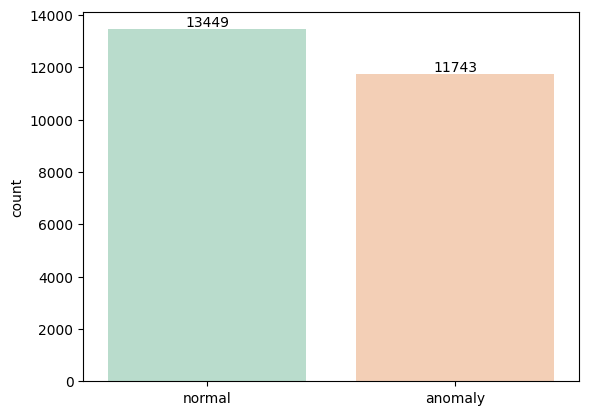

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=train["class"], palette=("Pastel2"))
abs_values = train["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [8]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [9]:
test.describe(include='object')

,protocol_type,service,flag
count,22544,22544,22544
unique,3,64,11
top,tcp,http,SF
freq,18880,7853,14875


In [10]:
# remove missing values (NaN)
train.dropna(inplace=True)
test.dropna(inplace=True)

In [11]:
# duplicates
print(f"Number of duplicate rows in train: {train.duplicated().sum()}")
print(f"Number of duplicate rows in test: {test.duplicated().sum()}")

Number of duplicate rows in train: 0
Number of duplicate rows in test: 57


### Label encoding
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [12]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)
label_encoding(test)

train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,0
25188,0,1,19,9,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,0
25189,0,1,46,1,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
25190,0,1,38,5,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


### Scale and split data

In [13]:
from sklearn.model_selection import train_test_split

X = train.drop(['class'], axis=1)
y = train['class']

Let's use [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) since it's not so sensitive to outliers like StandardScaler and MinMaxScaler.

In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

In [15]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, random_state=42, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, random_state=42, test_size=0.5)

### Feature selection
Trying select the most "important" features, it can improve performance further.

In [16]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE

# rfc = RandomForestClassifier()

# rfe = RFE(rfc, n_features_to_select=10)
# rfe = rfe.fit(X_train, y_train)

In [17]:
# bool_idx = np.array([rank == 1 for rank in rfe.ranking_])
# X_train_reduced = X_train[:, bool_idx]

## Supervised models

## Unsupervised models

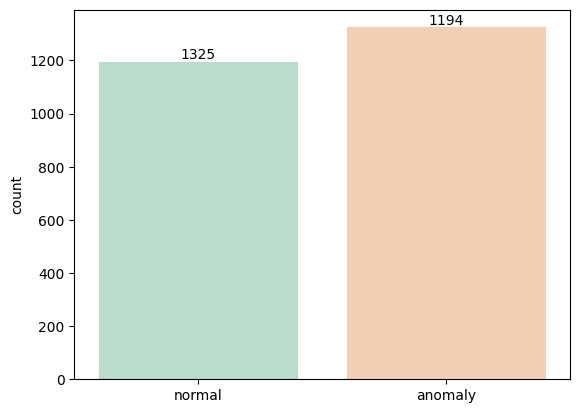

In [19]:
df = pd.DataFrame(X)
df["class"] = pd.DataFrame(y)
df = df.sample(frac=0.1)

ax = sns.countplot(x=df["class"], palette=("Pastel2"))
abs_values = df["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

X_sample = df.drop(['class'], axis=1).to_numpy()
y_sample = df['class'].to_numpy()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

def print_stats(predictions, X, y, title):
    # Predict the anomalies
    print(len(predictions[predictions == -1]), " outliers from ", len(predictions))
    print("0 is anomaly, 1 is normal")
    predictions = [0 if p == -1 else 1 for p in predictions]
    print(classification_report(y, predictions))

    conf = confusion_matrix(y_pred=predictions,y_true=y)
    plt.title(title)
    ax= plt.subplot()
    sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Normal', 'Anomaly']); 
    ax.yaxis.set_ticklabels(['Normal', 'Anomaly']);
    plt.show()

### One-class SVM

In [20]:
# from sklearn.svm import OneClassSVM
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# kernel_range = ['linear', 'rbf', 'sigmoid']
# nu_range = [0.1, 0.2, 0.3, 0.4, 0.5]
# gamma_range = ['scale', 'auto']
# degree_range = [2, 3, 4, 5]

# # Store results
# best_score = -1
# best_params = {}

# for kernel in kernel_range:
#     for nu in nu_range:
#         for gamma in gamma_range:
#             for degree in degree_range:
#                 model = OneClassSVM(kernel=kernel, nu=nu, gamma=gamma, degree=degree).fit(X_sample)
#                 predictions = model.predict(X_sample)
#                 predictions = [0 if p == -1 else 1 for p in predictions]

#                 score = accuracy_score(y_true=y_sample, y_pred=predictions)
#                 if best_score < score:
#                     best_score = score
#                     best_params = {'kernel': kernel, 'nu': nu, 'gamma': gamma, 'degree': degree}
                    
#         print("kernel ", kernel, " nu ", nu, " gamma ", gamma)

# print("Best score:", best_score)
# print("Best hyperparameters:", best_params) 

In [21]:
# from sklearn.svm import OneClassSVM
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# kernel_range = ['poly']
# nu_range = [0.1, 0.2, 0.3, 0.4, 0.5]
# gamma_range = ['scale', 'auto']

# # Store results
# best_score = -1
# best_params = {}

# for kernel in kernel_range:
#     for nu in nu_range:
#         for gamma in gamma_range:
#             model = OneClassSVM(kernel=kernel, nu=nu, gamma=gamma).fit(X_sample)
#             predictions = model.predict(X_sample)
#             predictions = [0 if p == -1 else 1 for p in predictions]

#             score = accuracy_score(y_true=y_sample, y_pred=predictions)
#             if best_score < score:
#                 best_score = score
#                 best_params = {'kernel': kernel, 'nu': nu, 'gamma': gamma, 'degree': degree}
                    
#         print("kernel ", kernel, " nu ", nu, " gamma ", gamma)

# print("Best score:", best_score)
# print("Best hyperparameters:", best_params) 

7327  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      9378
           1       0.79      0.94      0.86     10775

    accuracy                           0.84     20153
   macro avg       0.85      0.83      0.83     20153
weighted avg       0.85      0.84      0.83     20153



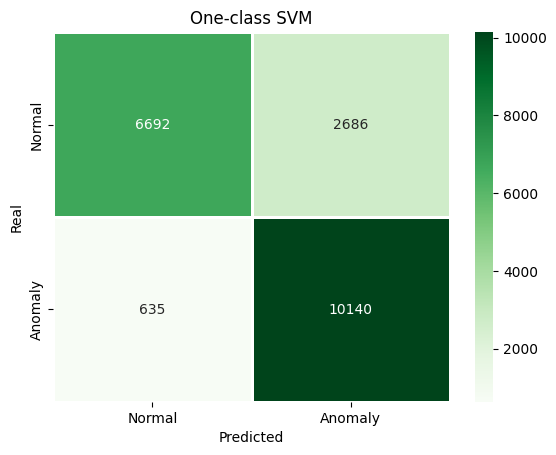

In [22]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='poly', nu=0.2, gamma='scale').fit(X_train)
predictions = model.predict(X_train)
print_stats(predictions, X_train, y_train, "One-class SVM")

921  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1197
           1       0.78      0.94      0.86      1323

    accuracy                           0.83      2520
   macro avg       0.85      0.83      0.83      2520
weighted avg       0.85      0.83      0.83      2520



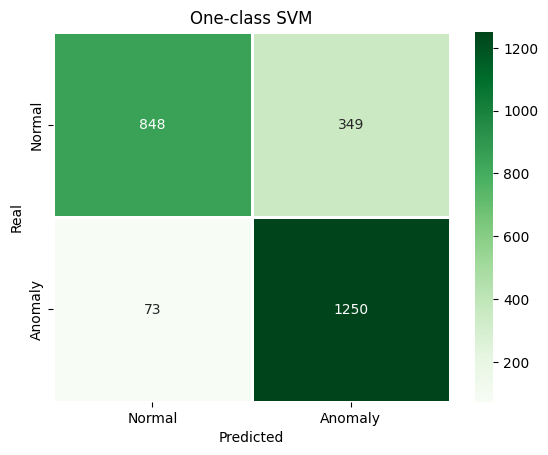

In [23]:
predictions = model.predict(X_test)
print_stats(predictions, X_test, y_test, "One-class SVM")

### Local Outlier Factor

In [24]:
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# n_neighbors_range = range(5, 50)
# algorithm_range = ['ball_tree', 'kd_tree']
# leaf_size_range = range(20, 50)

# # Store results
# best_score = -1
# best_params = {}

# for n_neighbors in n_neighbors_range:
#     for algorithm in algorithm_range:
#         for leaf_size in leaf_size_range:
#             predictions = LocalOutlierFactor(n_neighbors=n_neighbors, algorithm=algorithm, leaf_size=leaf_size).fit_predict(X_sample)
#             predictions = [0 if p == -1 else 1 for p in predictions]

#             score = accuracy_score(y_true=y_sample, y_pred=predictions)
#             if best_score < score:
#                 best_score = score
#                 best_params = {'n_neighbors': n_neighbors, 'algorithm': algorithm, 'leaf_size': leaf_size}

#         print(f"n_neighbors: {n_neighbors}, algorithm: {algorithm}")

# print("Best score:", best_score)
# print("Best hyperparameters:", best_params)

In [25]:
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# n_neighbors_range = range(5, 50)
# algorithm_range = ['auto', 'brute']

# # Store results
# best_score = -1
# best_params = {}

# for n_neighbors in n_neighbors_range:
#     for algorithm in algorithm_range:
#         predictions = LocalOutlierFactor(n_neighbors=n_neighbors, algorithm=algorithm, leaf_size=leaf_size).fit_predict(X_sample)
#         predictions = [0 if p == -1 else 1 for p in predictions]

#         score = accuracy_score(y_true=y_sample, y_pred=predictions)
#         if best_score < score:
#             best_score = score
#             best_params = {'n_neighbors': n_neighbors, 'algorithm': algorithm}

#         print(f"n_neighbors: {n_neighbors}, algorithm: {algorithm}")

# print("Best score:", best_score)
# print("Best hyperparameters:", best_params)

1156  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.35      0.04      0.08      9378
           1       0.53      0.93      0.67     10775

    accuracy                           0.52     20153
   macro avg       0.44      0.49      0.38     20153
weighted avg       0.45      0.52      0.40     20153



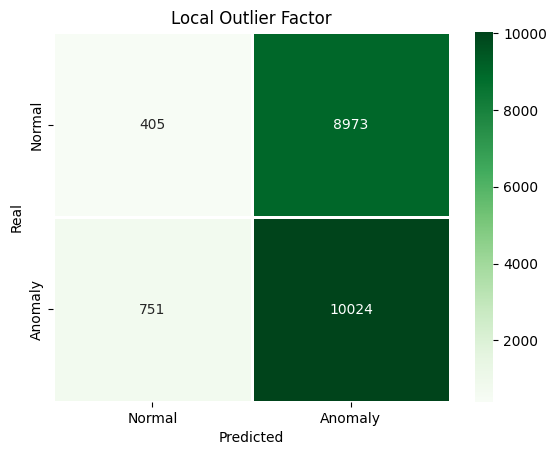

In [26]:
from sklearn.neighbors import LocalOutlierFactor

predictions = LocalOutlierFactor(n_neighbors=20, algorithm='auto').fit_predict(X_train)
print_stats(predictions, X_train, y_train, "Local Outlier Factor")

315  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.45      0.12      0.19      1197
           1       0.52      0.87      0.65      1323

    accuracy                           0.51      2520
   macro avg       0.49      0.49      0.42      2520
weighted avg       0.49      0.51      0.43      2520



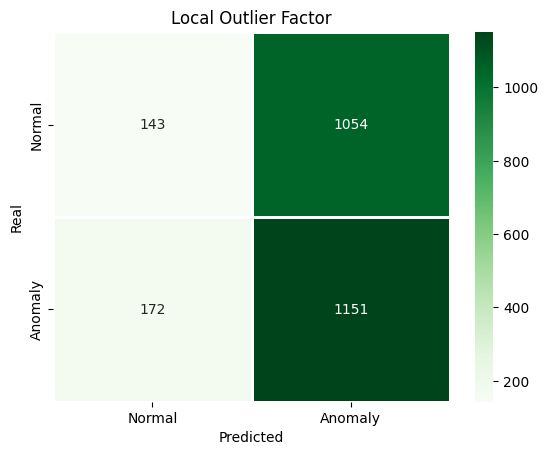

In [27]:
predictions = LocalOutlierFactor(n_neighbors=20, algorithm='auto').fit_predict(X_test)
print_stats(predictions, X_test, y_test, "Local Outlier Factor")

### Isolation Forest

In [28]:
# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# n_estimators_range = range(100, 500, 10)
# max_features_range = range(1, 42)

# # Store results
# best_score = -1
# best_params = {}

# for n_estimators in n_estimators_range:
#     for max_features in max_features_range:
#         model = IsolationForest(n_estimators=n_estimators, max_features=max_features).fit(X_sample)
#         predictions = model.predict(X_sample)
#         predictions = [0 if p == -1 else 1 for p in predictions]

#         score = accuracy_score(y_true=y_sample, y_pred=predictions)
#         if best_score < score:
#             best_score = score
#             best_params = {'n_estimators': n_estimators, 'max_features': max_features}
#     print('n_estimators ', n_estimators)

# print("Best score:", best_score)
# print("Best hyperparameters:", best_params) 

1914  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.64      0.13      0.22      9378
           1       0.55      0.94      0.69     10775

    accuracy                           0.56     20153
   macro avg       0.59      0.53      0.46     20153
weighted avg       0.59      0.56      0.47     20153



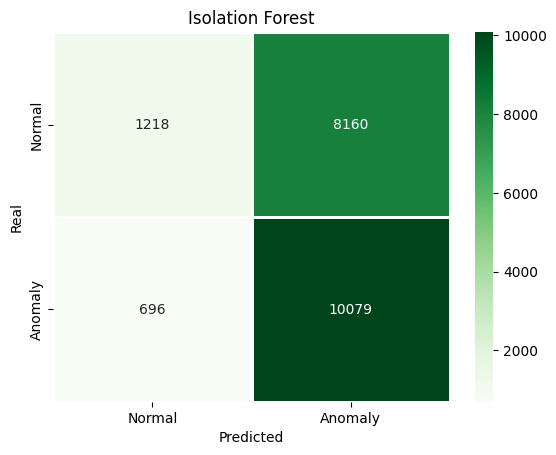

In [29]:
from sklearn.ensemble import IsolationForest

model = IsolationForest().fit(X_train)
predictions = model.predict(X_train)
print_stats(predictions, X_train, y_train, "Isolation Forest")

240  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.67      0.13      0.22      1197
           1       0.55      0.94      0.69      1323

    accuracy                           0.56      2520
   macro avg       0.61      0.54      0.46      2520
weighted avg       0.60      0.56      0.47      2520



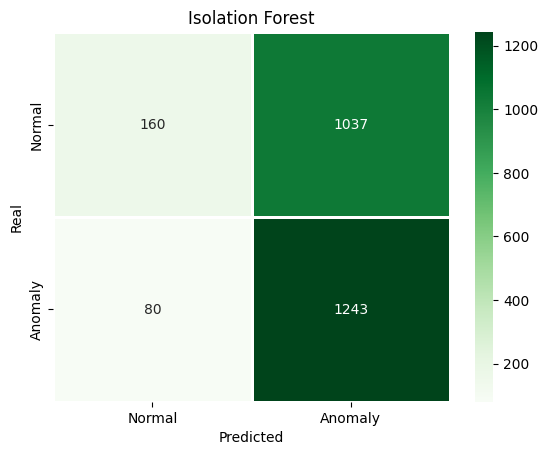

In [30]:
predictions = model.predict(X_test)
print_stats(predictions, X_test, y_test, "Isolation Forest")

### Gaussian Mixture Model

In [35]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

# Hyperparameters grid
n_components_range = [1, 2, 3, 4, 5]
covariance_type_range = ['full', 'tied', 'diag', 'spherical']
n_init_range = [1, 2, 3]

# Store results
best_score = -1
best_params = {}
best_threshold = None

for n_components in n_components_range:
    for covariance_type in covariance_type_range:
        for n_init in n_init_range:
            model = GaussianMixture(n_components=n_components, covariance_type=covariance_type, n_init=n_init, random_state=42).fit(X_train)
            
            scores = model.score_samples(X_train)
            threshold = np.percentile(scores, 40)
            predictions = [0 if score < threshold else 1 for score in scores]

            score = accuracy_score(y_true=y_train, y_pred=predictions)
            if best_score < score:
                best_score = score
                best_params = {'n_components': n_components, 'covariance_type': covariance_type, 'n_init': n_init, 'random_state': 42}
                best_threshold = threshold
        print('n_components ', n_components, ' covariance_type ', covariance_type)
                
print("Best score:", best_score)
print("Best hyperparameters:", best_params)        
print("Best threshold:", best_threshold)

n_components  1  covariance_type  full
n_components  1  covariance_type  tied
n_components  1  covariance_type  diag
n_components  1  covariance_type  spherical
n_components  2  covariance_type  full
n_components  2  covariance_type  tied
n_components  2  covariance_type  diag
n_components  2  covariance_type  spherical
n_components  3  covariance_type  full
n_components  3  covariance_type  tied
n_components  3  covariance_type  diag
n_components  3  covariance_type  spherical
n_components  4  covariance_type  full
n_components  4  covariance_type  tied
n_components  4  covariance_type  diag
n_components  4  covariance_type  spherical
n_components  5  covariance_type  full
n_components  5  covariance_type  tied
n_components  5  covariance_type  diag
n_components  5  covariance_type  spherical
Best score: 0.7642534610231727
Best hyperparameters: {'n_components': 4, 'covariance_type': 'diag', 'n_init': 2, 'random_state': 42}
Best threshold: -2.6819169440951574


8061  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      9378
           1       0.75      0.84      0.79     10775

    accuracy                           0.76     20153
   macro avg       0.77      0.76      0.76     20153
weighted avg       0.77      0.76      0.76     20153



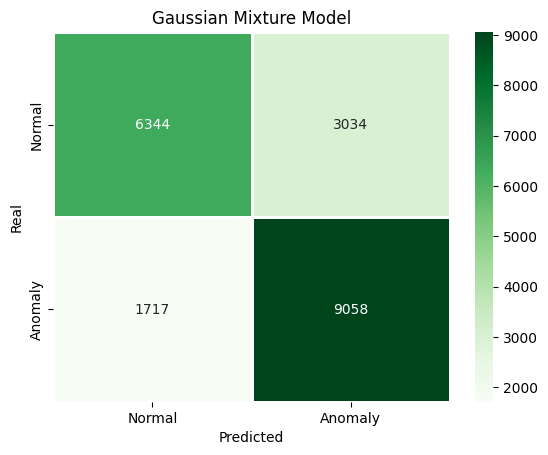

In [37]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, covariance_type='diag', n_init=2, random_state=42).fit(X_train)
scores = model.score_samples(X_train)
threshold = -2.6819169440951574
predictions = np.array([-1 if score < threshold else 1 for score in scores])
print_stats(predictions, X_train, y_train, "Gaussian Mixture Model")

321  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.62      0.17      0.26      1197
           1       0.55      0.91      0.68      1323

    accuracy                           0.56      2520
   macro avg       0.58      0.54      0.47      2520
weighted avg       0.58      0.56      0.48      2520



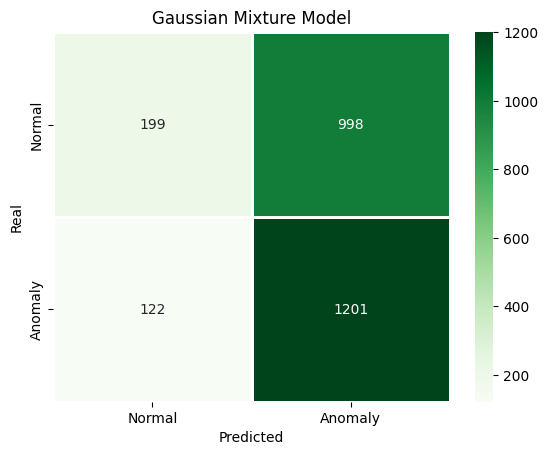

In [39]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, covariance_type='diag', n_init=2, random_state=42).fit(X_test)
scores = model.score_samples(X_test)
threshold = -2.6819169440951574
predictions = np.array([-1 if score < threshold else 1 for score in scores])
print_stats(predictions, X_test, y_test, "Gaussian Mixture Model")

## Autoencoder
https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*MMRDQ4g3QvQNc7iJsKM9pg@2x.png" width="800"/>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" width="800"/>

In [74]:
import tensorflow as tf
from tensorflow.keras import layers, losses

# Keep only the normal data for the training dataset
X_train_normal = X_train[y_train == 1]
X_valid_normal = X_valid[y_valid == 1]

# Input layer
input = tf.keras.layers.Input(shape=(41,))

# Encoder layers
encoder = tf.keras.Sequential([
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(4, activation='relu')])(input)

# Decoder layers
decoder = tf.keras.Sequential([
      layers.Dense(8, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(41, activation="sigmoid")])(encoder)

# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)

In [76]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mae')
# Fit the autoencoder
history = autoencoder.fit(X_train_normal, X_train_normal, 
          epochs=20, 
          batch_size=256,
          validation_data=(X_valid_normal, X_valid_normal),
          shuffle=True)

Epoch 1/20
43/43 [==============================] - 2s 7ms/step - loss: 5.9181 - val_loss: 6.1426
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 5.9089 - val_loss: 6.1383
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 5.9065 - val_loss: 6.1369
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 5.9052 - val_loss: 6.1357
Epoch 5/20
43/43 [==============================] - 0s 3ms/step - loss: 5.9042 - val_loss: 6.1344
Epoch 6/20
43/43 [==============================] - 0s 3ms/step - loss: 5.9014 - val_loss: 6.1305
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 5.8989 - val_loss: 6.1296
Epoch 8/20
43/43 [==============================] - 0s 4ms/step - loss: 5.8979 - val_loss: 6.1285
Epoch 9/20
43/43 [==============================] - 0s 4ms/step - loss: 5.8968 - val_loss: 6.1274
Epoch 10/20
43/43 [==============================] - 0s 4ms/step - loss: 5.8956 - val_loss: 6.1264
Epoch 11/20
43/43 [

79/79 [==============================] - 0s 1ms/step
14  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.93      0.01      0.02      1197
           1       0.53      1.00      0.69      1323

    accuracy                           0.53      2520
   macro avg       0.73      0.51      0.36      2520
weighted avg       0.72      0.53      0.37      2520



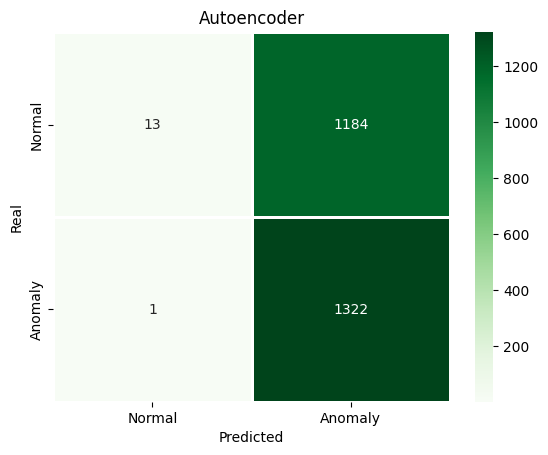

In [73]:
# Calculate MAE loss for validation data
valid_predictions = autoencoder.predict(X_valid_normal)
valid_loss = np.mean(np.abs(valid_predictions - X_valid_normal), axis=1)
threshold = np.max(valid_loss)

# Detect anomalies in the test set
test_predictions = autoencoder.predict(X_test)
test_loss = np.mean(np.abs(test_predictions - X_test), axis=1)
test_loss = test_loss.reshape((-1))

predictions = np.array([-1 if loss > threshold else 1 for loss in test_loss])
print_stats(predictions, X_test, y_test, "Autoencoder")